# Mapping
- Visualize Demand ⇒ RED, using “TractLOWI” as population data, by zip-code area
    - Very high risk: “LILATracts_halfAnd10”
    - High risk: “LILATracts_1And10”
    - Mid risk: “LILATracts_1And20”
    - Other: “LowIncomeTracts”

## Preparation

In [1]:
# to read and visualize spatial data
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

Duplicate key in file PosixPath('/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 768 ('font.family: IPAexGothic')


In [2]:
# df_bound is for boundary plotting
path = "./geo_data/tl_2021_us_county/tl_2021_us_county.shp" # from https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2021&layergroup=Counties+%28and+equivalent%29
df_bound = gpd.read_file(path)
df_bound = df_bound.to_crs("EPSG:4326")

# All US -> Only PA
df_bound = df_bound[df_bound["STATEFP"] == "42"]
# All PA -> Only the 11 counties
df_bound = df_bound[df_bound["NAME"].isin(["Allegheny", "Armstrong", "Beaver", "Butler", "Cambria", 
                                           "Fayette", "Greene", "Indiana", "Lawrence", "Somerset", "Washington"])]

## Import geo data
You need to select the geo-data for your regional unit.  
(e.g.) If you have data by **zip code**, you have to select geo-data for zip code.

Zip code data is large, so it may take some time to load.

In [3]:
# Geodata of PA by Zipcode
path = "./geo_data/tl_2021_us_zcta520/tl_2021_us_zcta520.shp"
df_geo = gpd.read_file(path)
df_geo = df_geo.to_crs("EPSG:4326")

In [4]:
# Delete unnecessary columns
df_geo = df_geo[["ZCTA5CE20", "geometry"]]

In [5]:
# Change dtype
df_geo = df_geo.astype({'ZCTA5CE20': int})

## Import Demand Data


In [6]:
# Read Demand Data
df = pd.read_csv("./data/USDA_cleandata_OnlyGpcfbArea_4.csv") 

In [7]:
# Check data
df.head()

,CensusTract,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LowIncomeTracts,PovertyRate,TractLOWI,Population,County
0,42003010300,0,1,0,1,46.1,540,1171,Allegheny County
1,42003020100,0,0,0,0,17.5,990,5668,Allegheny County
2,42003020300,0,0,0,0,6.4,102,1601,Allegheny County
3,42003030500,0,0,0,1,39.5,1588,4022,Allegheny County
4,42003040200,0,1,0,1,47.9,887,1852,Allegheny County


In [8]:
df.dtypes

CensusTract               int64
LILATracts_1And10         int64
LILATracts_halfAnd10      int64
LILATracts_1And20         int64
LowIncomeTracts           int64
PovertyRate             float64
TractLOWI                 int64
Population                int64
County                   object
dtype: object

## Converting CensusTract -> Zip

In [9]:
# Data for convert
df_cen_zip = pd.read_csv("./geo_data/ZIP_TRACT_122021.csv")

In [10]:
df_cen_zip = df_cen_zip[["zip", "tract"]]

In [11]:
df_cen_zip.dtypes

zip      int64
tract    int64
dtype: object

In [12]:
# merge, key=CensusTract
df_demand = pd.merge(df, df_cen_zip, left_on='CensusTract', right_on='tract')

In [13]:
df_demand.head()

,CensusTract,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LowIncomeTracts,PovertyRate,TractLOWI,Population,County,zip,tract
0,42003010300,0,1,0,1,46.1,540,1171,Allegheny County,15219,42003010300
1,42003020100,0,0,0,0,17.5,990,5668,Allegheny County,15222,42003020100
2,42003020100,0,0,0,0,17.5,990,5668,Allegheny County,15272,42003020100
3,42003020100,0,0,0,0,17.5,990,5668,Allegheny County,15262,42003020100
4,42003020100,0,0,0,0,17.5,990,5668,Allegheny County,15259,42003020100


In [14]:
df_demand.dtypes

CensusTract               int64
LILATracts_1And10         int64
LILATracts_halfAnd10      int64
LILATracts_1And20         int64
LowIncomeTracts           int64
PovertyRate             float64
TractLOWI                 int64
Population                int64
County                   object
zip                       int64
tract                     int64
dtype: object

In [15]:
# group zy zip
df_demand = df_demand.groupby('zip').sum()

In [16]:
df_demand.head()

,CensusTract,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LowIncomeTracts,PovertyRate,TractLOWI,Population,tract
zip,,,,,,,,,
15001,588102307708,2,3,2,4,198.3,12624,170152,588102307708
15003,336048354003,3,4,3,4,80.5,5113,62996,336048354003
15004,42125713700,0,0,0,0,14.0,1461,10445,42125713700
15005,294049031806,0,1,0,1,30.9,4467,110222,294049031806
15006,42003407002,0,0,0,0,6.6,989,14917,42003407002


In [17]:
df_demand.shape

(1907, 9)

In [18]:
# Drop 
df_demand = df_demand.drop("PovertyRate", axis=1)
df_demand = df_demand.drop("tract", axis=1)
df_demand = df_demand.drop("CensusTract", axis=1)

In [19]:
# Fix "LILATracts_1And10", "LILATracts_halfAnd10", "LILATracts_1And20", "LowIncomeTracts", 
conditions = [ df_demand['LILATracts_1And10'] >= 1 ]
choices = [1]
df_demand['LILATracts_1And10'] = np.select(conditions, choices, default=0) 

conditions = [ df_demand['LILATracts_halfAnd10'] >= 1 ]
choices = [1]
df_demand['LILATracts_halfAnd10'] = np.select(conditions, choices, default=0) 

conditions = [ df_demand['LILATracts_1And20'] >= 1 ]
choices = [1]
df_demand['LILATracts_1And20'] = np.select(conditions, choices, default=0) 

conditions = [ df_demand['LowIncomeTracts'] >= 1 ]
choices = [1]
df_demand['LowIncomeTracts'] = np.select(conditions, choices, default=0) 

In [20]:
# Add risk level column

conditions = [ df_demand['LILATracts_halfAnd10'] == 1 ]
choices = [3]
df_demand['Risk_Level'] = np.select(conditions, choices, default=0) 

conditions = [ df_demand['LILATracts_1And20'] == 1 ]
choices = [1]
df_demand['Risk_Level'] = np.select(conditions, choices, df_demand['Risk_Level']) 

conditions = [ df_demand['LILATracts_1And10'] == 1 ]
choices = [2]
df_demand['Risk_Level'] = np.select(conditions, choices, df_demand['Risk_Level'])

In [21]:
df_demand.describe()

,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LowIncomeTracts,TractLOWI,Population,Risk_Level
count,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,0.172522,0.295228,0.140535,0.530676,4587.923964,50954.188778,0.713162
std,0.377933,0.456265,0.347632,0.499189,5836.279101,59343.422092,1.134247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1349.500000,12904.500000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,2735.000000,28794.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,5486.500000,66087.500000,2.000000
max,1.000000,1.000000,1.000000,1.000000,62533.000000,650411.000000,3.000000


## Merge Geo Data & Demand Data

In [22]:
# add geo-data
# df_geo = df_geo.astype({'ZCTA5CE20': int})
df_ = pd.merge(df_demand, df_geo, left_on="zip", right_on="ZCTA5CE20")

In [23]:
# pandas -> geopandas 
gdf = gpd.GeoDataFrame(df_, geometry='geometry') 

## Mapping

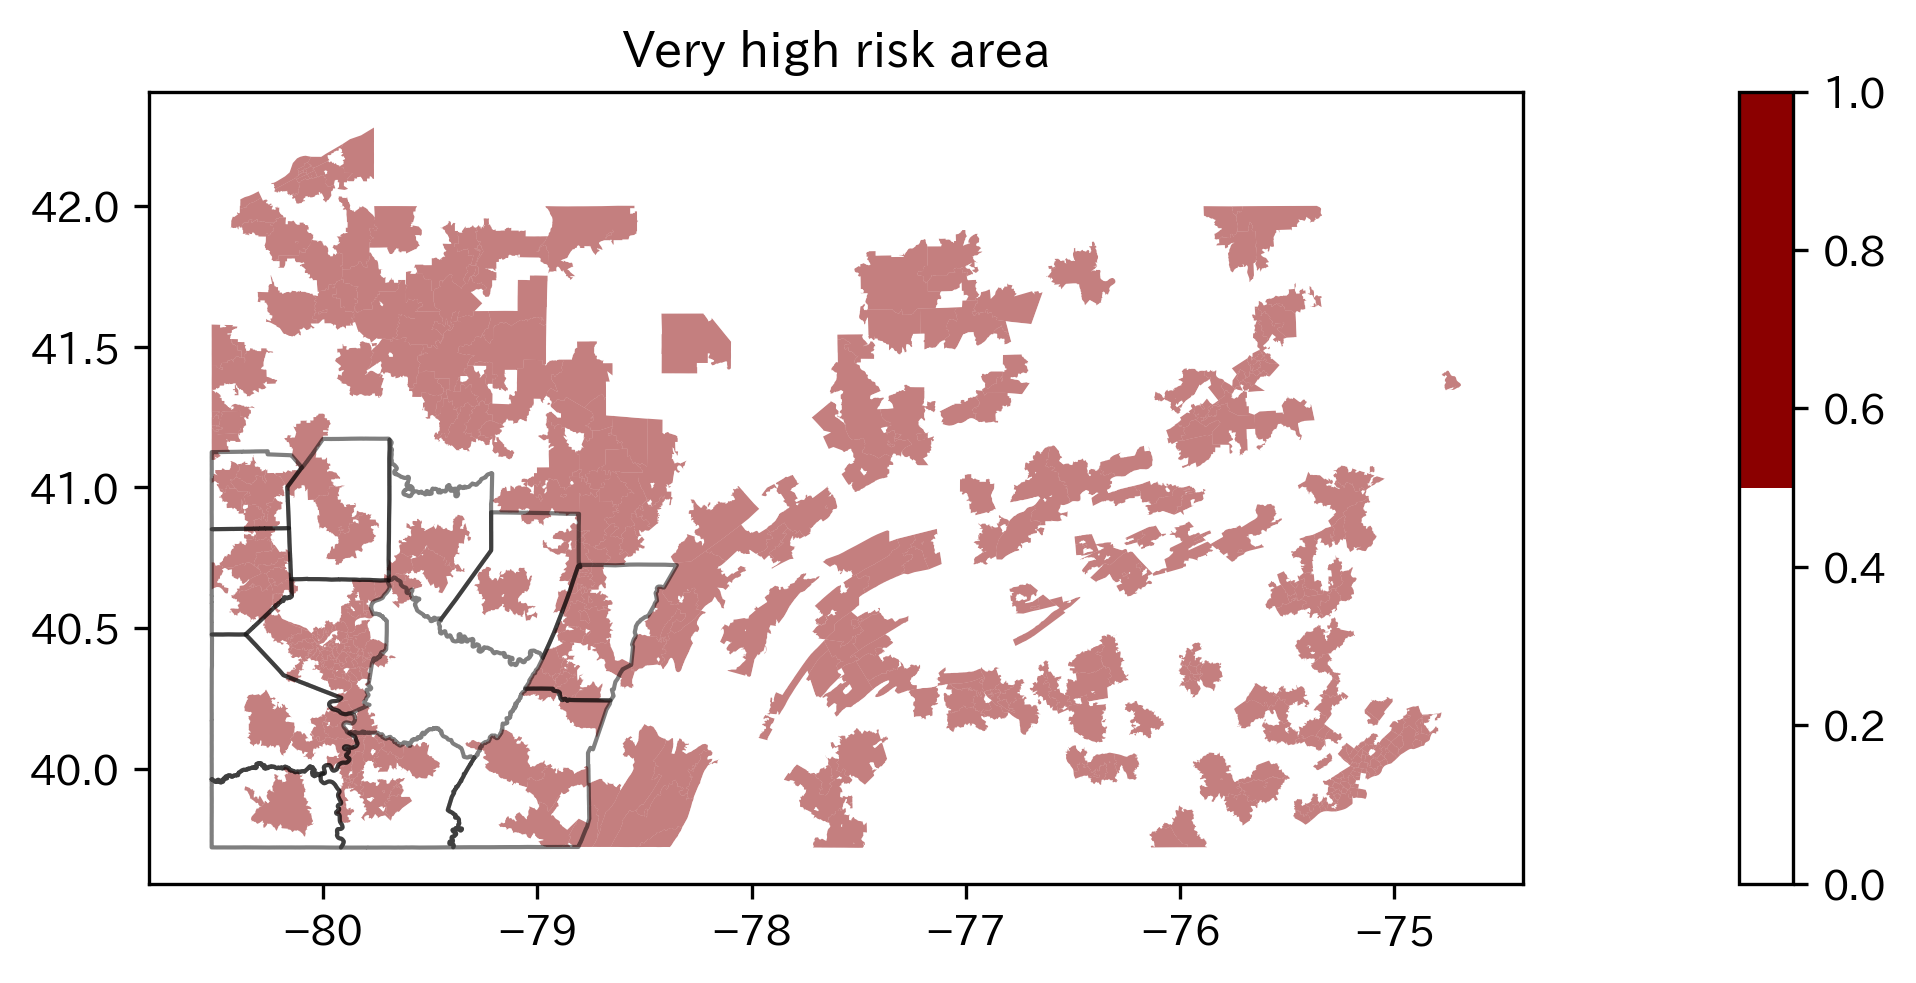

In [25]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Color map
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["white", "darkred"])

# Specify the data column name that you want to visualize in color.
data = "LILATracts_halfAnd10"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Very high risk area')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

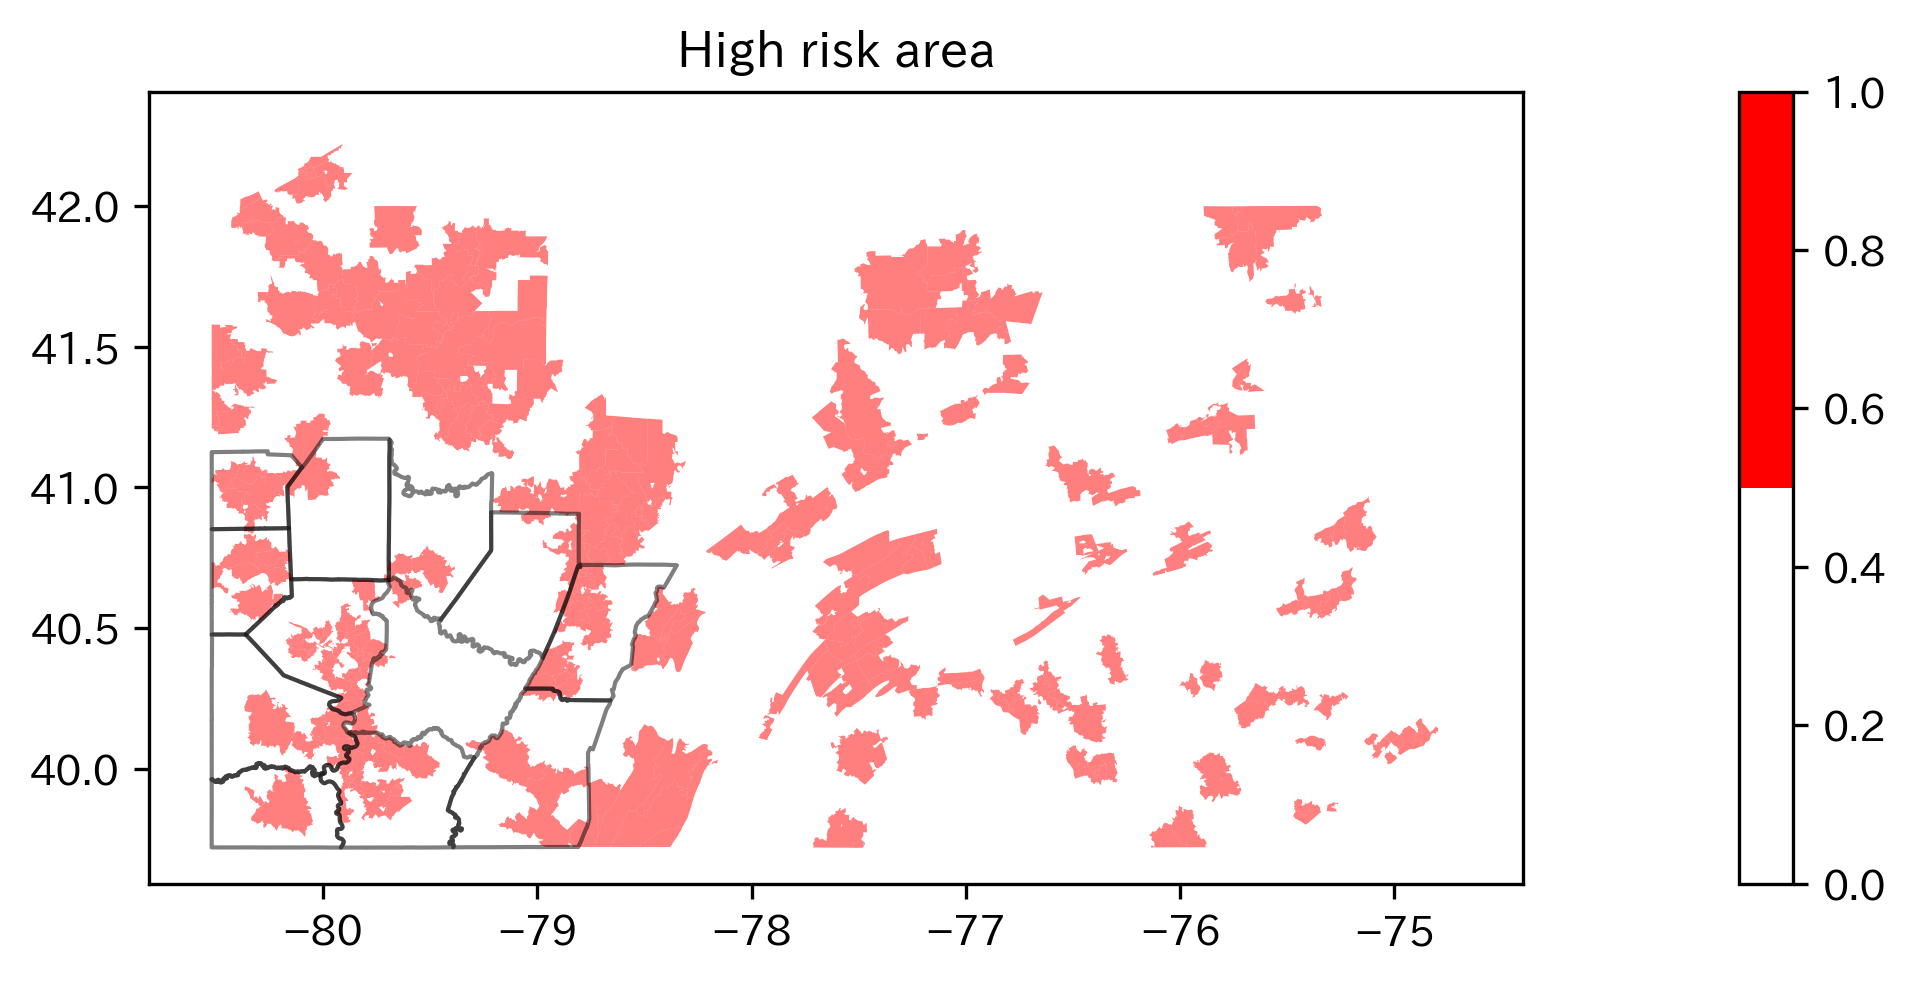

In [26]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Color map
cmap = ListedColormap(["white", "red"])


# Specify the data column name that you want to visualize in color.
data = "LILATracts_1And10"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('High risk area')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

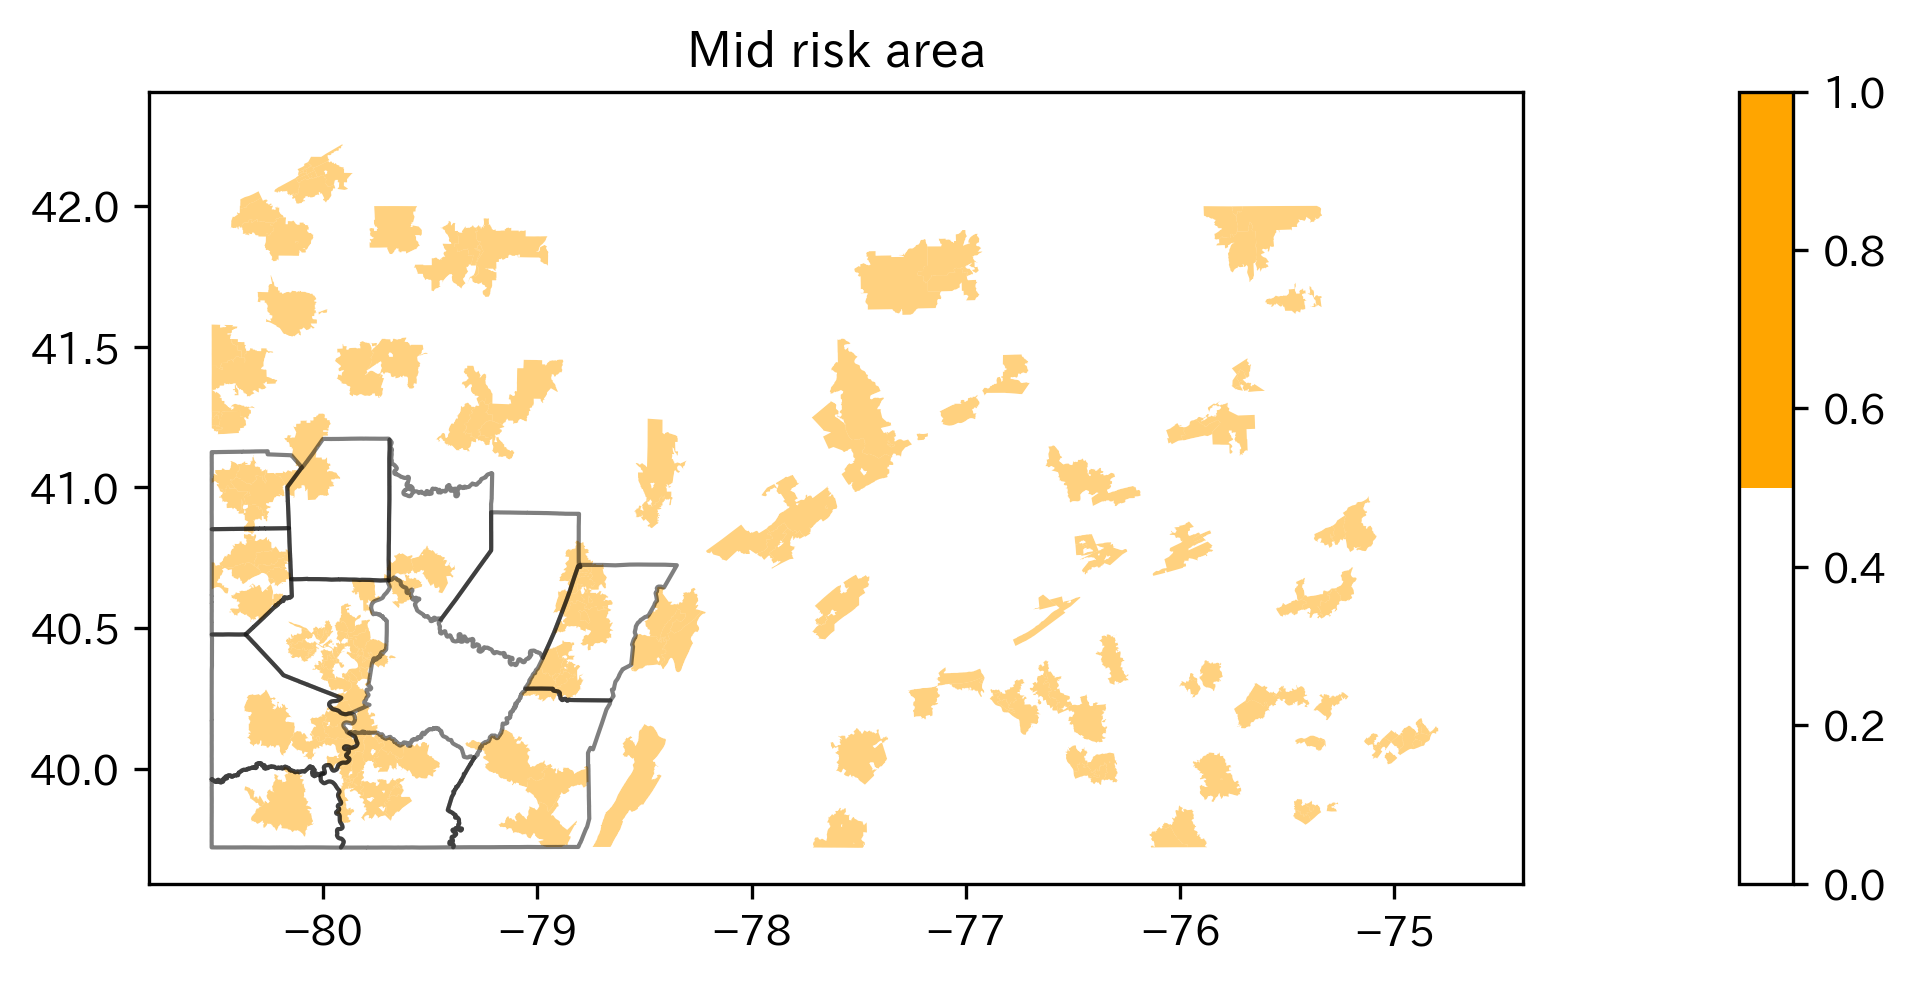

In [27]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Color map
cmap = ListedColormap(["white", "orange"])

# Specify the data column name that you want to visualize in color.
data = "LILATracts_1And20"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Mid risk area')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

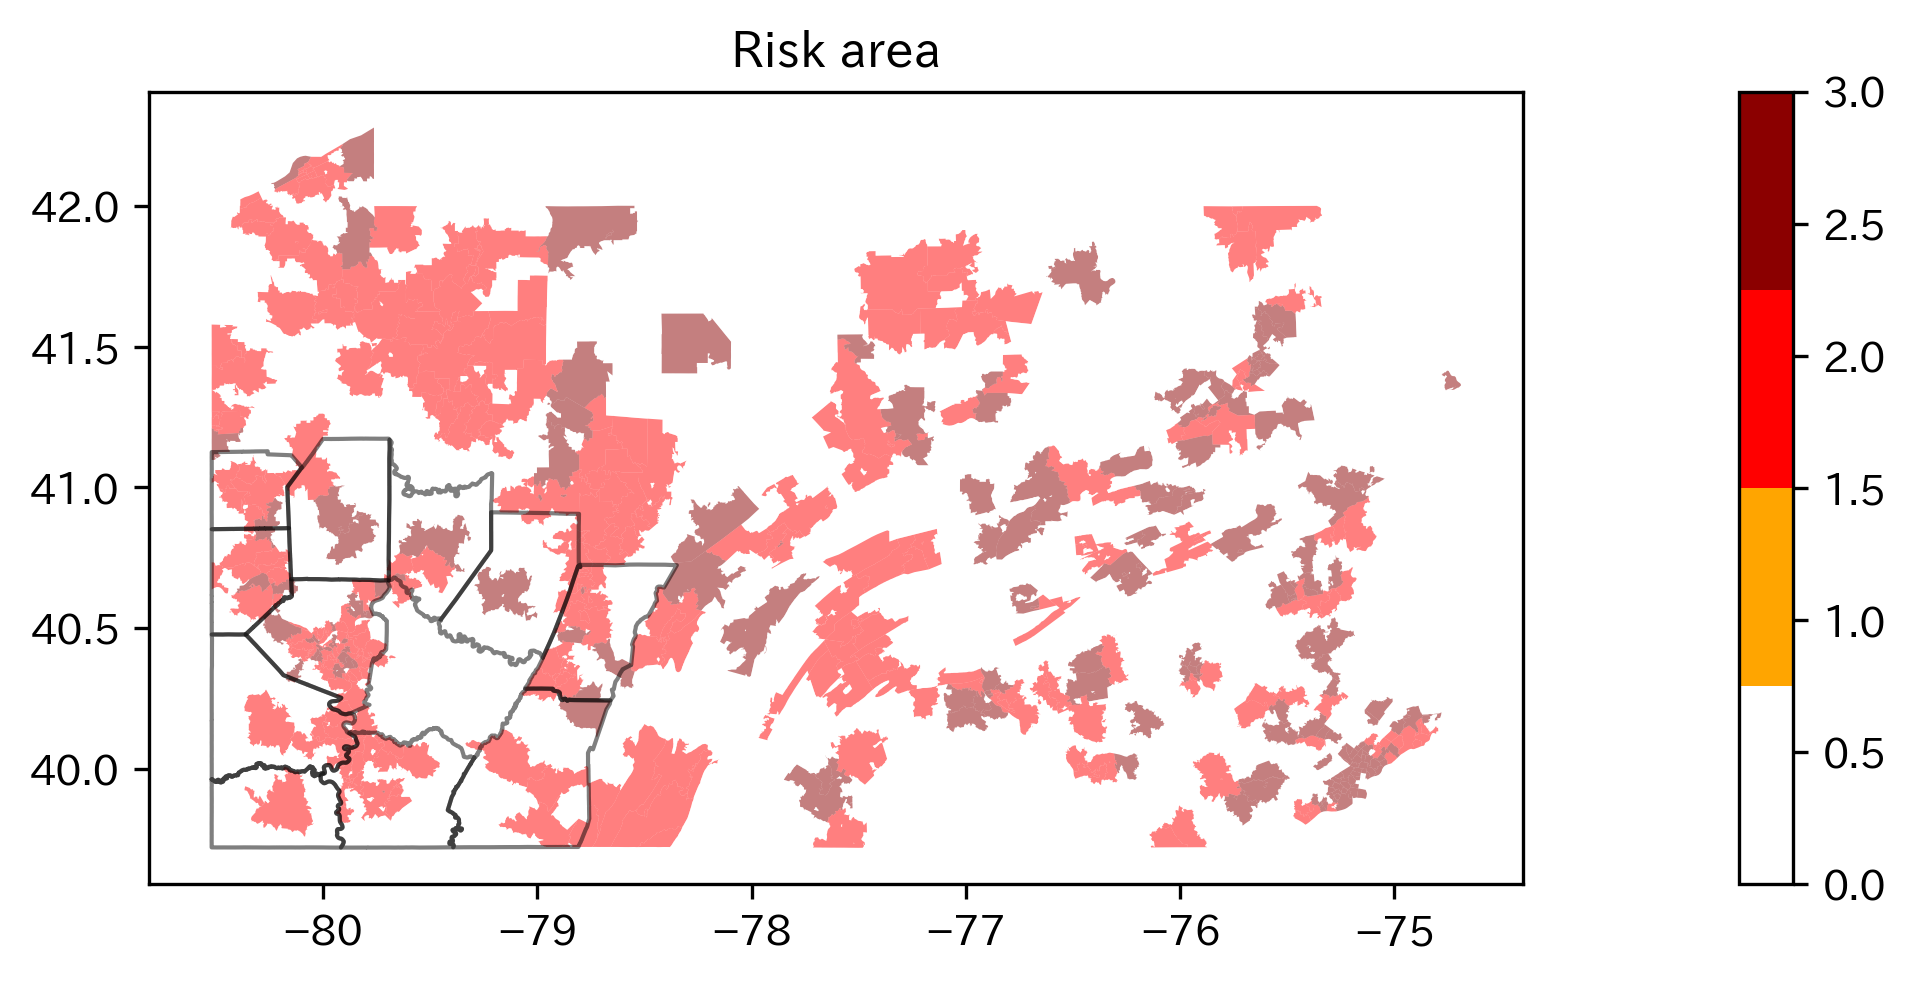

In [28]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Color mapping
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["white", "orange", "red", "darkred"])

# Specify the data column name that you want to visualize in color.
# data = "LILATracts_1And20"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Risk area')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot("Risk_Level", ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

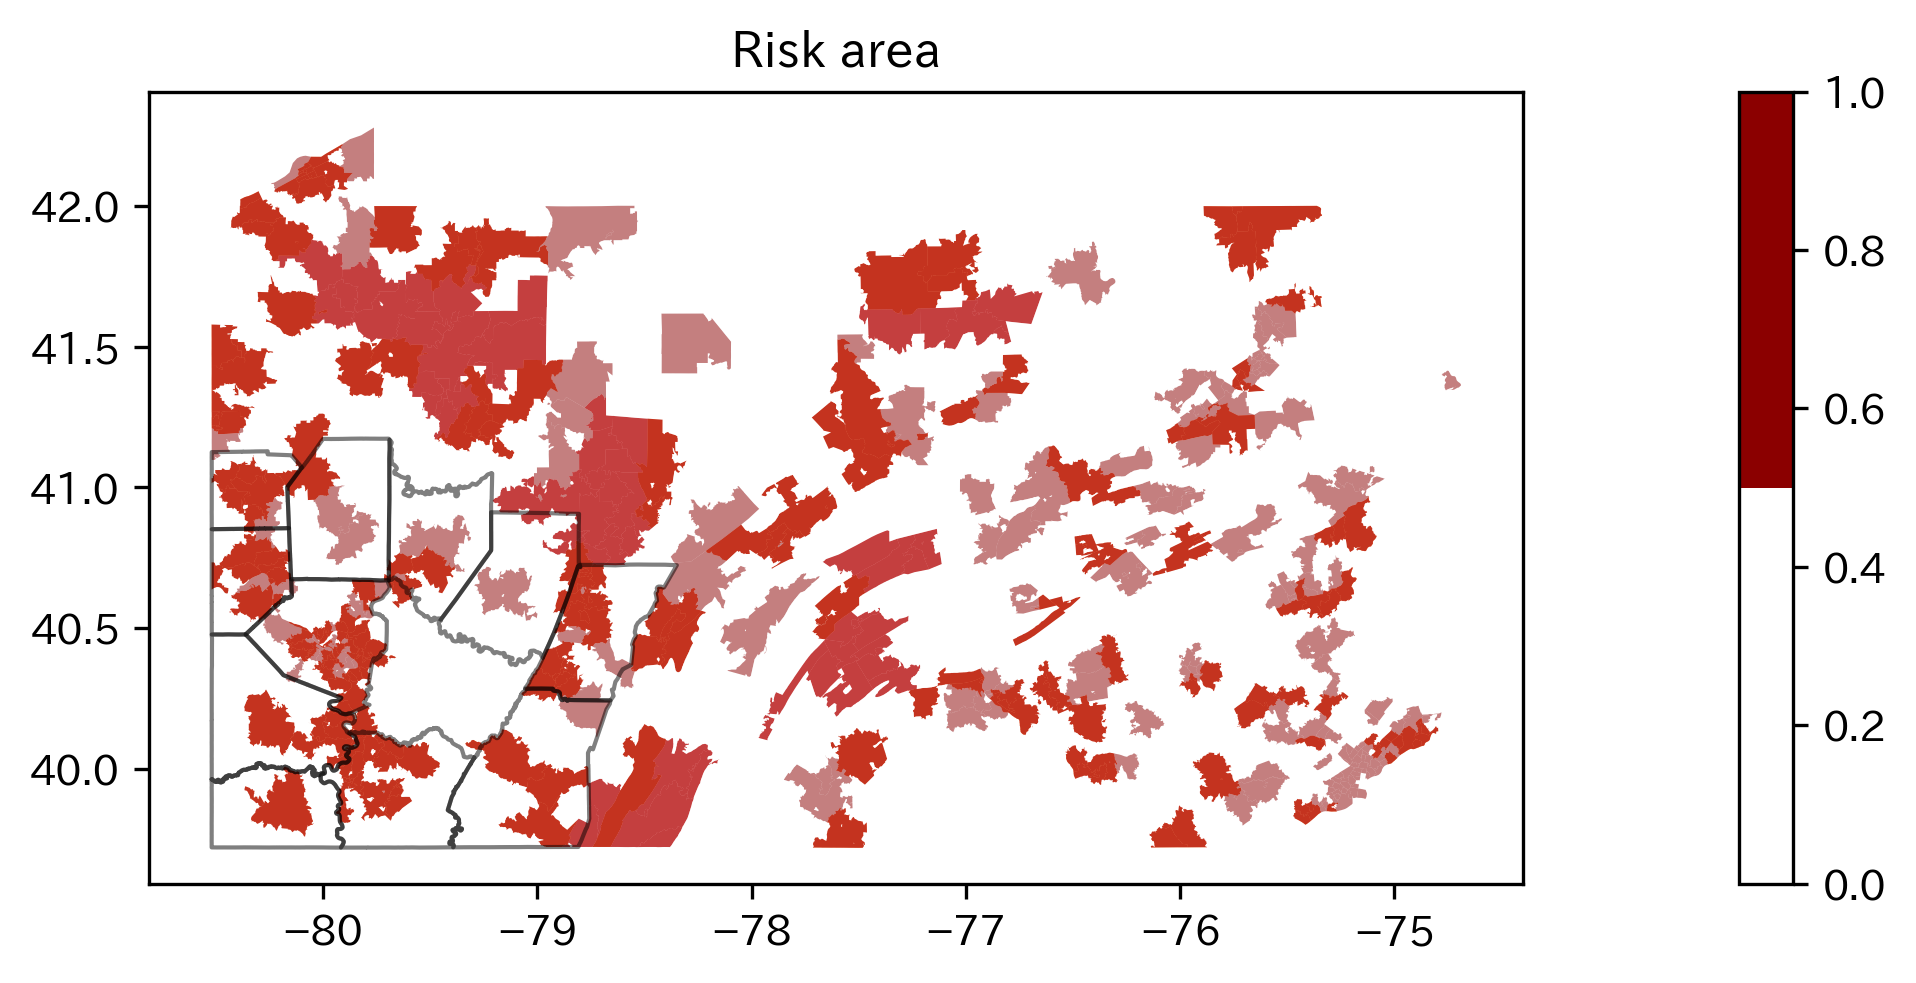

In [29]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Color mapping
from matplotlib.colors import ListedColormap
darkred = ListedColormap(["white", "darkred"])
red = ListedColormap(["white", "red"])
orange = ListedColormap(["white", "orange"])

# Specify the data column name that you want to visualize in color.
# data = "LILATracts_1And20"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Risk area')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot("LILATracts_1And20", ax=ax, alpha=0.5, cmap=orange, edgecolor='k', legend=True, cax=cax, linewidth=0)
gdf.plot("LILATracts_1And10", ax=ax, alpha=0.5, cmap=red, edgecolor='k', legend=True, cax=cax, linewidth=0)
gdf.plot("LILATracts_halfAnd10", ax=ax, alpha=0.5, cmap=darkred, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

## Visualize Supply